In [1]:
import numpy as np
from scipy import signal 
import matplotlib.pyplot as plt
from heartnet_v1 import heartnet

Using TensorFlow backend.


In [44]:
##initialize parameters of heartnet
bn_momentum = 0.99
random_seed = 1
eps= 1.1e-5
bias=False
l2_reg=0.
l2_reg_dense=0.
kernel_size=5
maxnorm=10000.
dropout_rate=0.5
dropout_rate_dense=0.
padding='valid'
activation_function='relu'
subsam=2

lr=0.0007
lr_decay=1e-8

#load_path='/media/taufiq/Data/heart_sound/models/fold0 2017-12-27 13:12:34.499110/weights.0022-0.7631.hdf5'
# load_path='/media/taufiq/Data/heart_sound/models/fold2 2017-12-26 15:20:36.867116/weights.0187-0.8527.hdf5'
#load_path='/media/taufiq/Data/heart_sound/remoteIICTweights/fold1 2017-12-20 15:26:47.011204/weights.0091-0.8898.hdf5'
# load_path='/media/taufiq/Data/heart_sound/models/fold0_noFIR 2018-01-16 17:25:30.579232/weights.0193-0.7411.hdf5'
# load_path='/media/taufiq/Data/heart_sound/models/fold1_noFIR 2018-01-16 19:58:54.149714/weights.0182-0.8773.hdf5'
# load_path='/media/taufiq/Data/heart_sound/models/fold2_noFIR 2018-01-16 13:40:22.284989/weights.0179-0.8756.hdf5'
# load_path='/media/taufiq/Data/heart_sound/models/fold3_noFIR 2018-01-16 19:59:03.934614/weights.0183-0.8581.hdf5'
load_path='/media/taufiq/Data/heart_sound/models/fold2_noFIR 2018-01-21 11:57:12.236015/weights.0183-0.8311.hdf5'
fs = 2000


In [45]:
# create heartnet with load path specified

model = heartnet(activation_function,bn_momentum,bias,dropout_rate,dropout_rate_dense,eps,kernel_size,l2_reg,l2_reg_dense,load_path,lr,lr_decay,maxnorm,padding,random_seed,subsam)
# model.summary()
weights = model.get_weights()

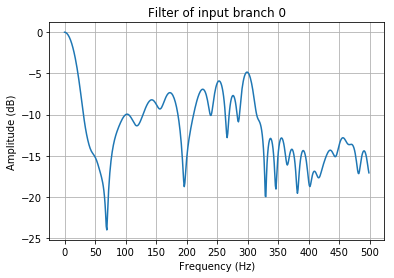

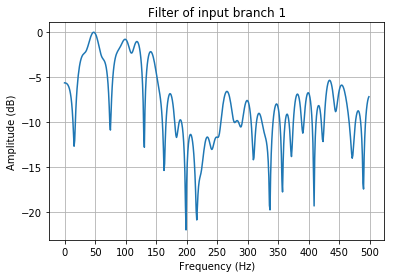

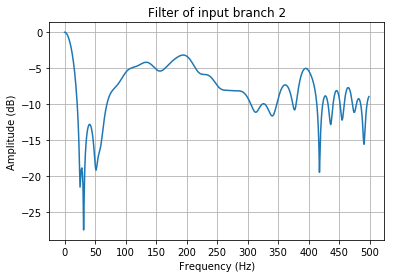

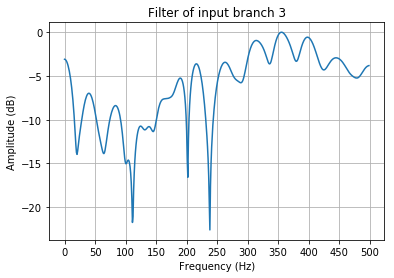

In [46]:
for i in range(4):
    input_ = i # 0-3
    weights_ = np.hstack(weights[input_])
    weights_ = np.reshape(weights_,[61,1])

    for i in range(0,1):
        w,freq_res=signal.freqz(weights_[:,i])
        plt.plot(w/np.pi*500,10*np.log10(abs(freq_res)/max(abs(freq_res))))
    plt.grid()
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.xticks(range(0,501,50))
#     plt.xscale('log')
    plt.title('Filter of input branch ' + np.str(input_))
#     plt.hold
    plt.show()

In [36]:
range(4)

[0, 1, 2, 3]